In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

In [ ]:
# draw_line([1.34,1.45],10.45,3.45,1.89)

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

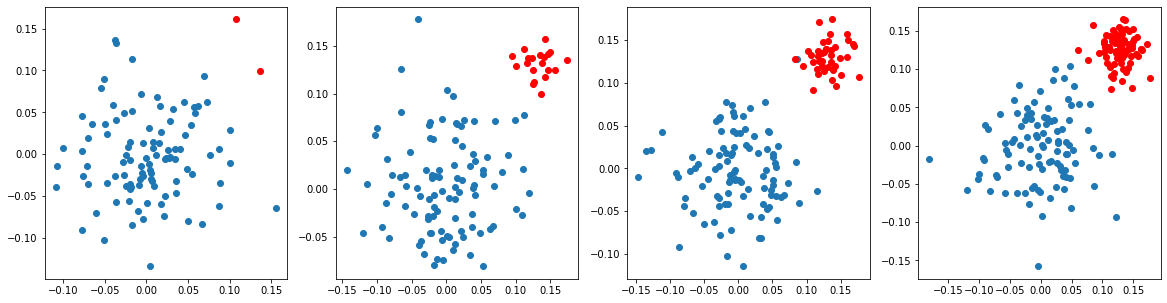

In [ ]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

In [ ]:
#you can start writing code here.

#SVM

In [ ]:
# print(X.shape,y.shape)

[[-1.77577164 -1.94096621]] [1.32638168]
[[-0.00243358 -0.00254152]] [1.16986115]
[[ 6.76157369e-05 -1.88508784e-05]] [0.39229545]
[[-10.07966708  -9.87495909]] [2.00073734]
[[-0.01822786 -0.01808572]] [1.00121464]
[[-0.00025365 -0.00019574]] [0.3648196]
[[-11.05701074  -9.84260411]] [1.54834909]
[[-0.03121391 -0.02862337]] [1.00223279]
[[-0.00040781 -0.00031782]] [0.35562588]
[[ -9.60791848 -10.6800876 ]] [1.19744334]
[[-0.06020107 -0.05966938]] [0.55961633]
[[-0.00060292 -0.00059769]] [0.3288964]


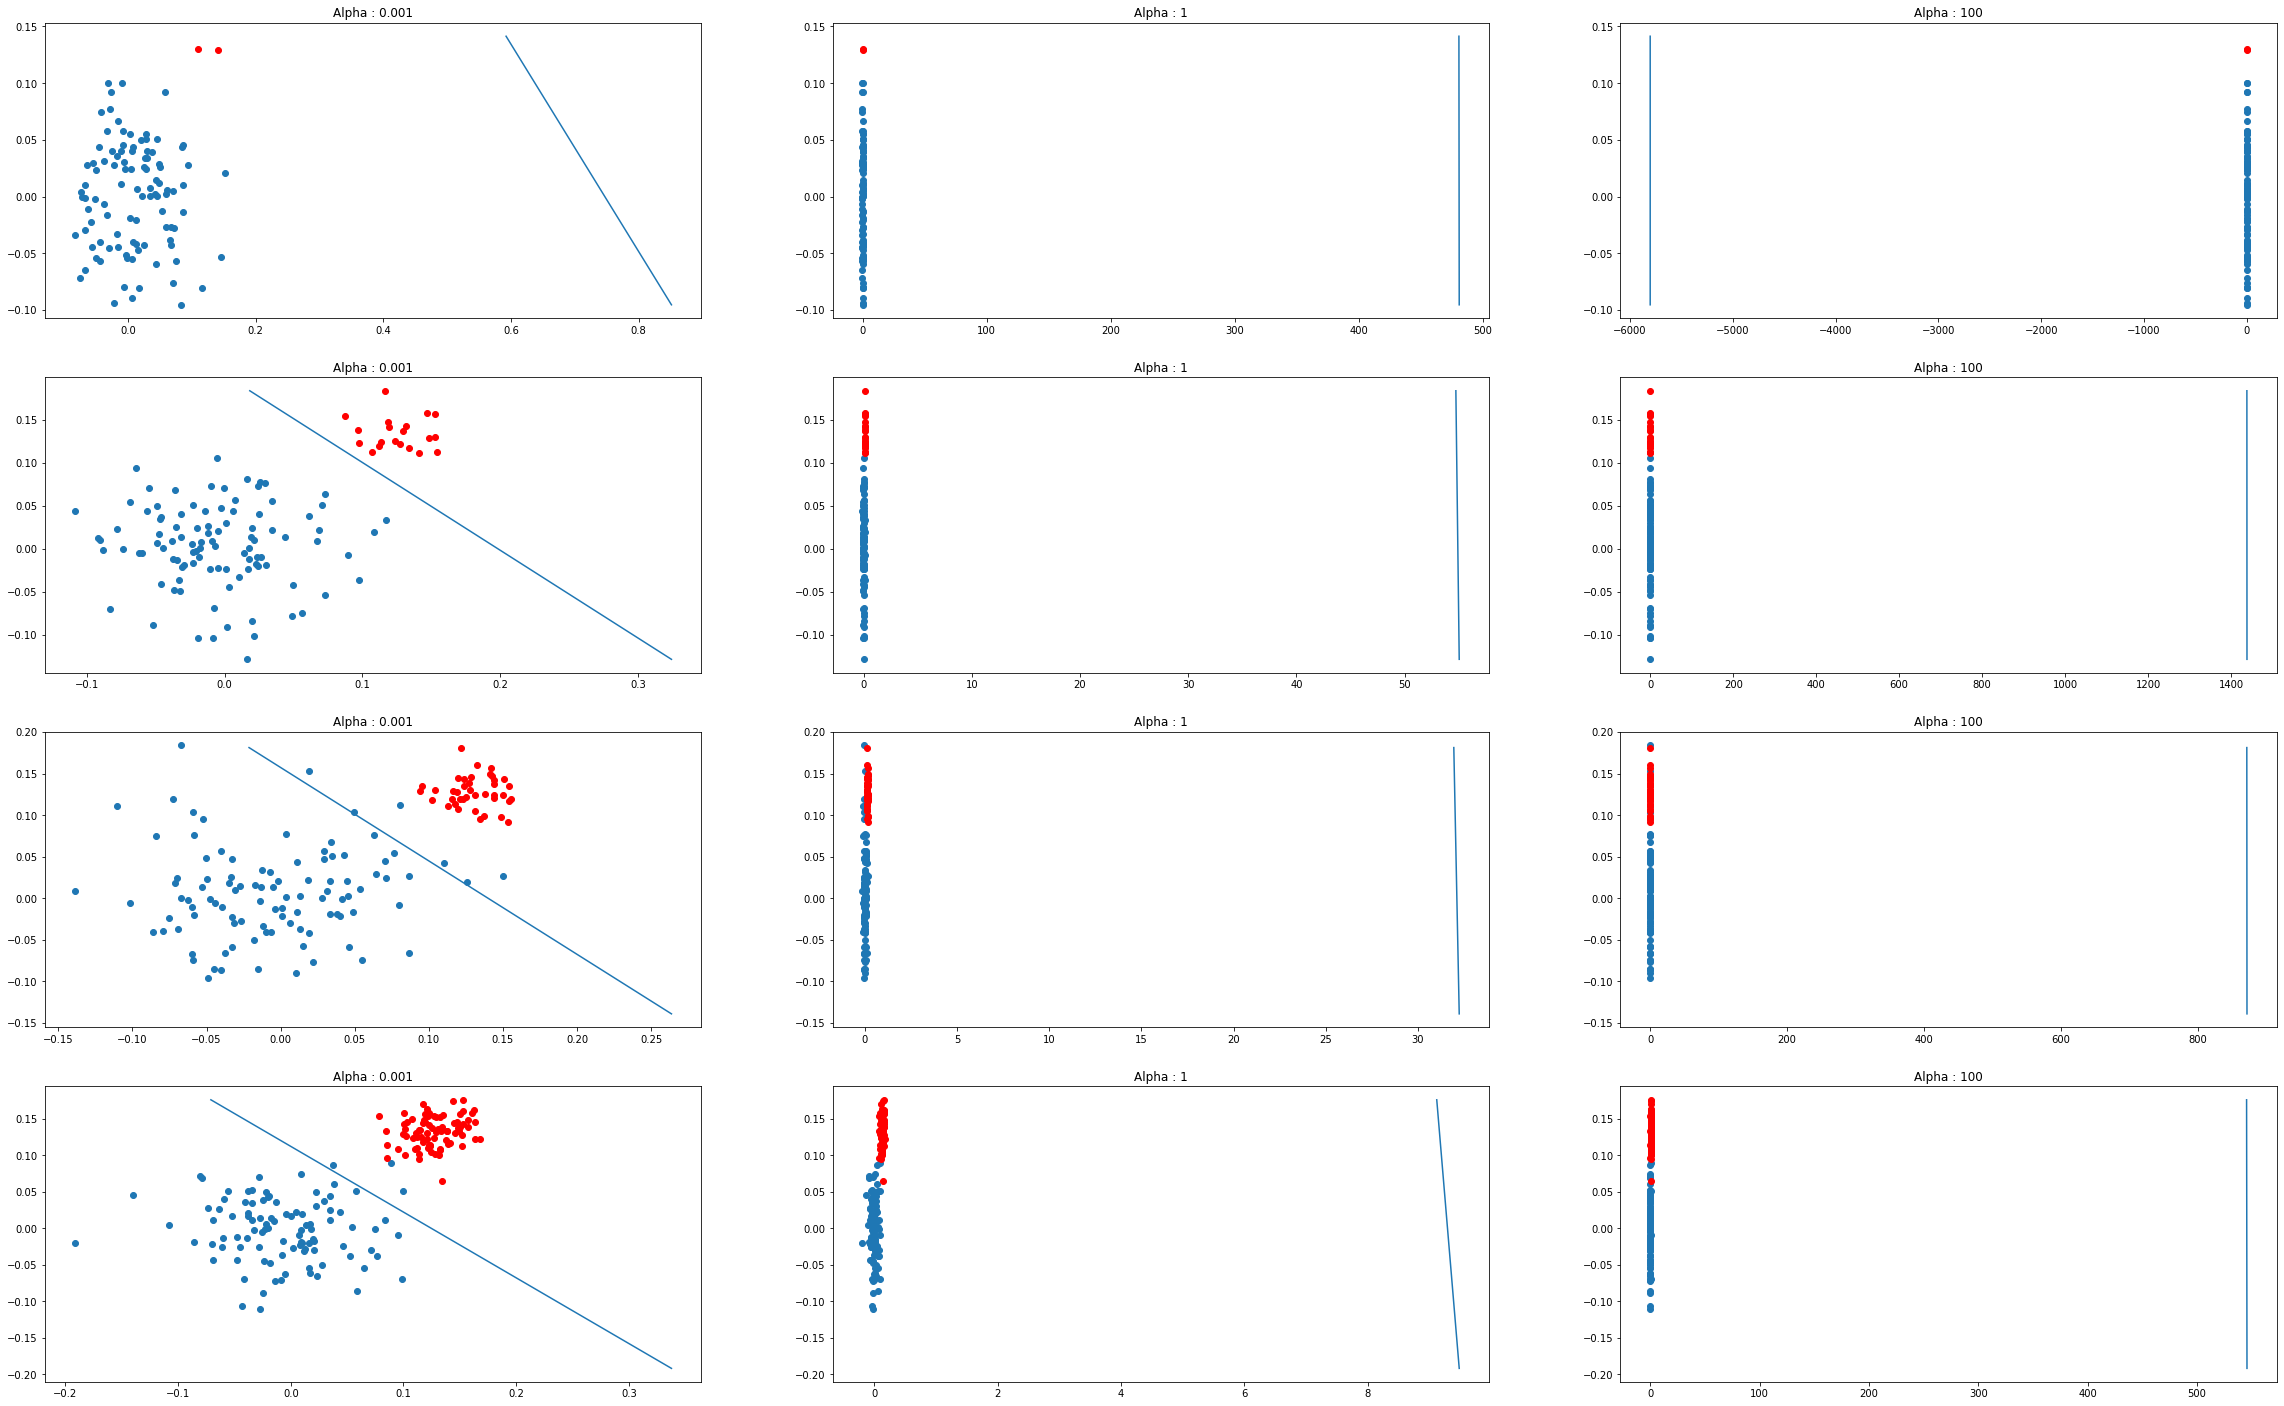

In [ ]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(40,25))
# ax = plt.subplot(3,4)
alpha = [0.001, 1, 100]
img =0

st = StandardScaler()


for j,i in enumerate(ratios):                                  #creating the sample dataset, for each ratio
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))

    #standarizing the values
    st_p = st.fit_transform(X_p)
    st_n = st.fit_transform(X_n)

    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)

    st_x = np.vstack((st_p,st_n))

    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    # print(y,y_p)
    for k in range(len(alpha)) :                                # Looping through the C value (inverse of lambda)
      img += 1
      model = SGDClassifier(loss = 'hinge',alpha = alpha[k])
    #   model = SVC(C=alpha[k],kernel = 'linear')                 # initializing the model
     
      model.fit(X,y)
      print(model.coef_,model.intercept_)                       # getting the coeff and intercept to plot the decision boundary
      plt.subplot(4,3,img).scatter(X_p[:,0],X_p[:,1])
      plt.subplot(4,3,img).scatter(X_n[:,0],X_n[:,1],color='red')
      plt.title(f'Alpha : {alpha[k]}')
      draw_line(model.coef_.flatten(),model.intercept_[0],X_p.min(),X_n.max())          #calling the function to plot Decision boundary
      
    

plt.show()


Observation : It can be seen from the graph as the number of data points increase, for the same regularisation parameter, the model performs better in classifying the classes. Also, as C (regularization param) increases, the model tries to overfit and makes the classification more accurate on the training data.(1st column)

#Logistic regression

[[-0.00027042 -0.00026392]] [3.91202295]
[[-0.26899247 -0.26252715]] [3.91143298]
[[-14.8858819  -14.28481903]] [4.57854772]
[[-0.00227567 -0.00223266]] [1.60952363]
[[-2.02590811 -1.98706504]] [1.70499259]
[[-24.54588501 -22.96492363]] [4.48500044]
[[-0.003676   -0.00363471]] [0.91655647]
[[-2.90792875 -2.9464666 ]] [1.16001139]
[[-25.15115454 -29.96089366]] [4.69281751]
[[-0.00545843 -0.00557062]] [0.22379238]
[[-3.83766755 -3.98365351]] [0.70202446]
[[-29.94939691 -30.14432818]] [4.84646821]


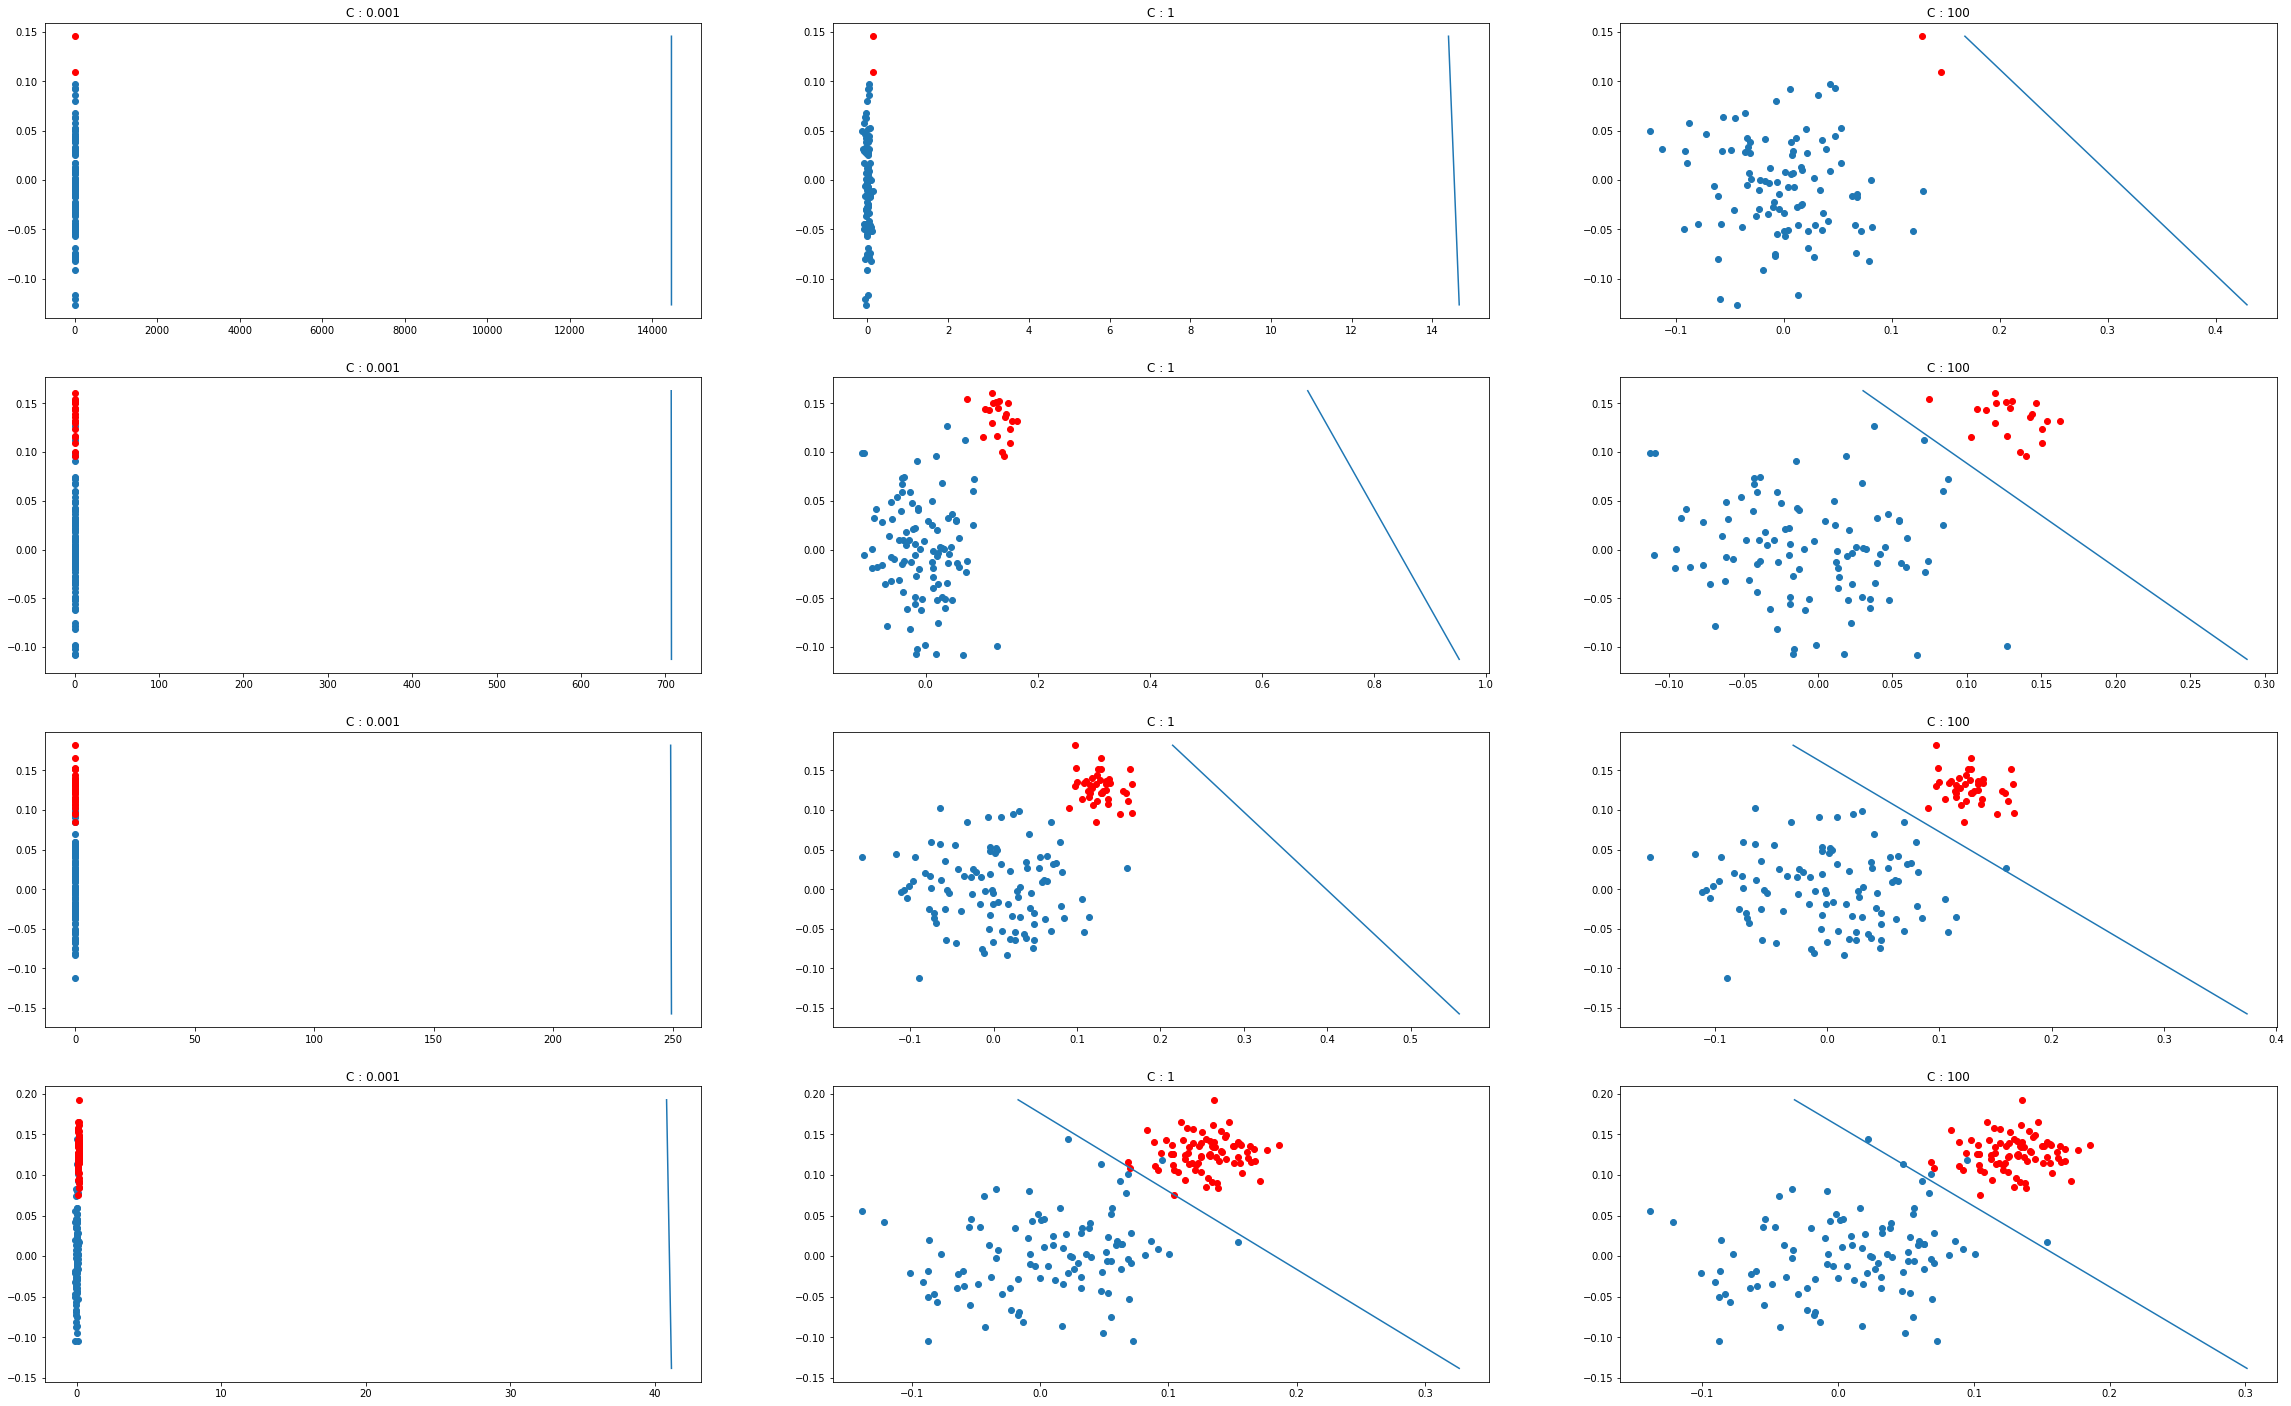

In [ ]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(40,25))
# ax = plt.subplot(3,4)
alpha = [0.001, 1, 100]
img =0
for j,i in enumerate(ratios):
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    # print(y,y_p)
    for k in range(len(alpha)) :
      img += 1
    #   model = SGDClassifier(loss = 'log',alpha = alpha[k])
      model = LogisticRegression(C = alpha[k])
      st = StandardScaler().fit_transform(X)
      # X = st.fit_transform(X)
      model.fit(X,y)
      print(model.coef_,model.intercept_)
      plt.subplot(4,3,img).scatter(X_p[:,0],X_p[:,1])
      plt.subplot(4,3,img).scatter(X_n[:,0],X_n[:,1],color='red')
      plt.title(f'C : {alpha[k]}')
      draw_line(model.coef_.flatten(),model.intercept_[0],X_p.min(),X_n.max())
      
    
     
plt.show()

The same observations from above holds true for logistic regression as well.

#SVC ( Linear ) (Own practice)

[[-2.23544901e-05 -9.68025526e-05]] [1.00000929]
[[-0.05708104 -0.06738695]] [1.00783835]
[[-5.70810415 -6.73869474]] [1.78383499]
[[-0.00155857 -0.0017953 ]] [1.00009526]
[[-1.50552395 -1.83213604]] [1.08973877]
[[-18.12046899 -16.87410591]] [3.25077622]
[[-0.00375923 -0.00450501]] [1.00005578]
[[-3.95486216 -4.31331024]] [1.03986225]
[[-15.23919119 -20.76337981]] [3.09512806]
[[-0.00914054 -0.0091557 ]] [0.99960125]
[[-6.36743709 -6.59027997]] [0.85215853]
[[-15.25908403 -20.97822236]] [2.86668625]


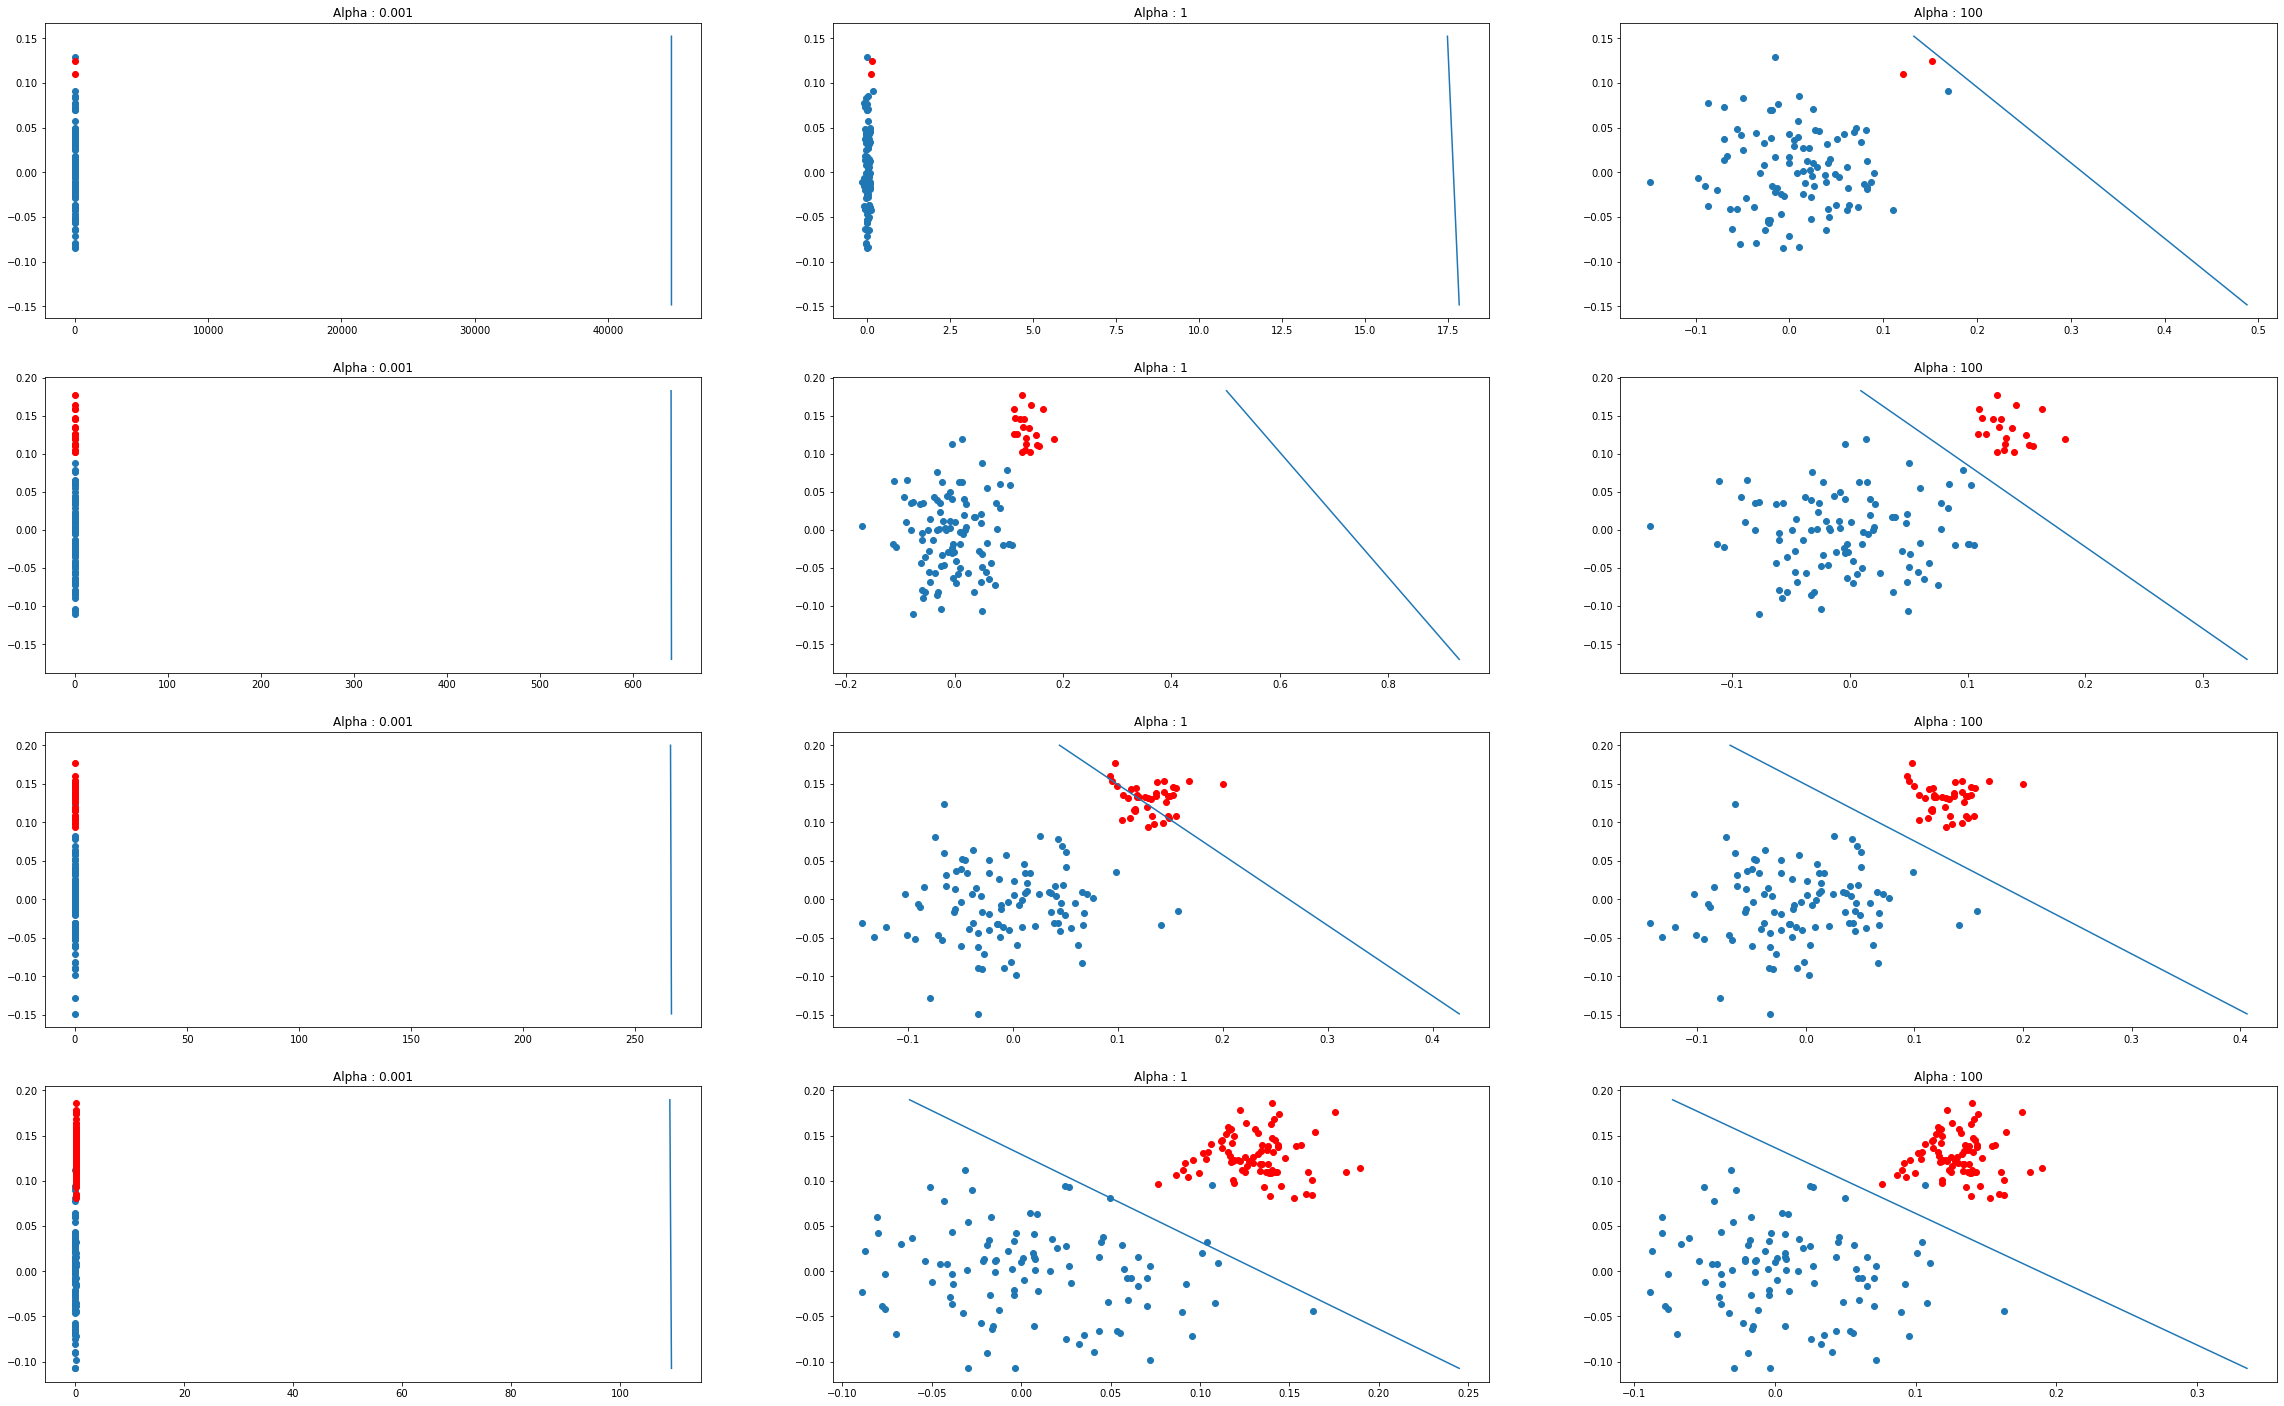

In [ ]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(40,25))
# ax = plt.subplot(3,4)
alpha = [0.001, 1, 100]
img =0

st = StandardScaler()


for j,i in enumerate(ratios):                                  #creating the sample dataset, for each ratio
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))

    #standarizing the values
    st_p = st.fit_transform(X_p)
    st_n = st.fit_transform(X_n)

    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)

    st_x = np.vstack((st_p,st_n))

    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    # print(y,y_p)
    for k in range(len(alpha)) :                                # Looping through the C value (inverse of lambda)
      img += 1
    #   model = SGDClassifier(loss = 'hinge',alpha = alpha[k])
      model = SVC(C=alpha[k],kernel = 'linear')                 # initializing the model
     
      model.fit(X,y)
      print(model.coef_,model.intercept_)                       # getting the coeff and intercept to plot the decision boundary
      plt.subplot(4,3,img).scatter(X_p[:,0],X_p[:,1])
      plt.subplot(4,3,img).scatter(X_n[:,0],X_n[:,1],color='red')
      plt.title(f'Alpha : {alpha[k]}')
      draw_line(model.coef_.flatten(),model.intercept_[0],X_p.min(),X_n.max())          #calling the function to plot Decision boundary
      
    

plt.show()
